In [1]:
#Project on Ride Rating Prediction

#The solution is divided into the following sections:

#. Data understanding and exploration
#. Data cleaning
#. Data preparation
#. Model building and evaluation

In [2]:
# 1. Data understanding and exploration

In [3]:
# Let's first have a look at the dataset and understand the size, attribute names etc.
#importing necessary libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [4]:
# reading the train dataset 
Ride_Data = pd.read_csv("https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Ride_Rating_Prediction/train.csv")
# reading the test dataset 
Ride_Data_test = pd.read_csv("https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Ride_Rating_Prediction/test.csv")

In [5]:
#summary of the data  51083 rows and 18 columns with no null value
Ride_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51083 entries, 0 to 51082
Data columns (total 18 columns):
Unnamed: 0                         51083 non-null int64
customer_id                        51083 non-null int64
driver_id                          51083 non-null int64
creation_date                      51083 non-null object
booking_source                     51083 non-null int64
car_type                           51083 non-null int64
estimated_distance                 51083 non-null float64
distance_travelled                 51083 non-null float64
distance_travelled_while_moving    51083 non-null float64
estimated_duration                 51083 non-null int64
duration_time                      51083 non-null int64
wait_time_initial                  51083 non-null int64
wait_time_in_journey               51083 non-null int64
estimated_price                    51083 non-null float64
price                              51083 non-null float64
is_cancelled                       51083

In [6]:
#head
Ride_Data.head()

,Unnamed: 0,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
0,0,52400320,1838640,2017-09-08 11:32:05.000,1,1,0.0,7.28666,7.17712,0,11,18,2,0.0,17.375184,0,4,1
1,1,29858456,1793472,2017-09-08 12:42:33.000,1,1,0.0,1.25836,1.05664,0,4,1,1,0.0,8.507064,0,4,1
2,2,30828968,1726788,2017-09-08 12:46:42.000,2,1,0.0,14.57820,14.44060,0,16,3,2,0.0,19.745205,0,5,1
3,3,47974768,1181696,2017-09-08 13:52:35.000,2,1,0.0,1.51911,1.18684,0,8,0,5,0.0,10.968003,0,0,0
4,4,59503764,2063752,2017-09-08 14:18:47.000,2,1,0.0,11.09320,10.67240,0,19,1,4,0.0,17.595398,0,5,1


Understanding the data dictionary

In [7]:
#getting a count of number of rating in eaach category
Ride_Data['rating'].astype('category').value_counts()

5    30298
0    16206
4     3086
1      706
3      576
2      211
Name: rating, dtype: int64

In [8]:
#getting a count of number of rides rated
Ride_Data['was_rated'].astype('category').value_counts()

1    34877
0    16206
Name: was_rated, dtype: int64

In [9]:
#getting a count of number of rides being cancelled
Ride_Data['is_cancelled'].astype('category').value_counts()

0    48898
1     2185
Name: is_cancelled, dtype: int64

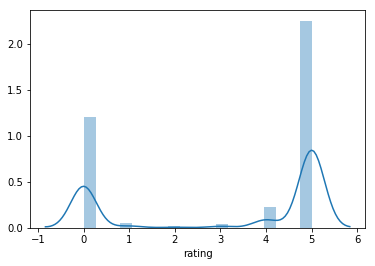

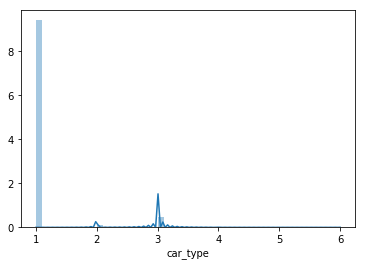

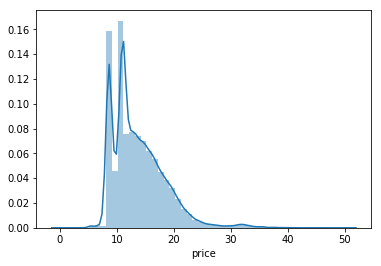

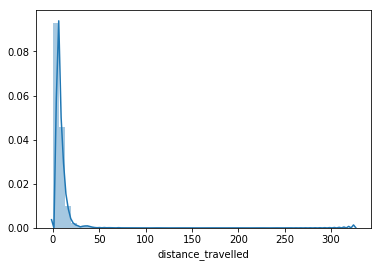

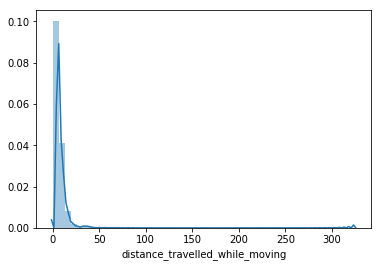

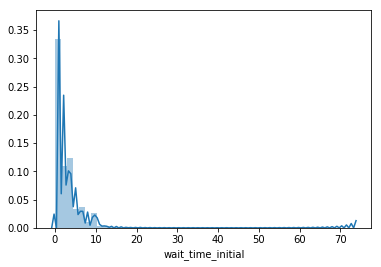

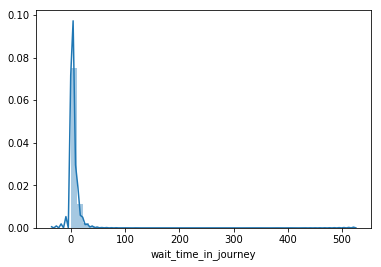

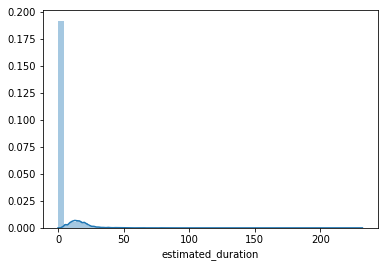

In [10]:
# plotting different variable
sns.distplot(Ride_Data['rating'])
plt.show()
sns.distplot(Ride_Data['car_type'])
plt.show()
sns.distplot(Ride_Data['price'])
plt.show()
sns.distplot(Ride_Data['distance_travelled'])
plt.show()
sns.distplot(Ride_Data['distance_travelled_while_moving'])
plt.show()
sns.distplot(Ride_Data['wait_time_initial'])
plt.show()
sns.distplot(Ride_Data['wait_time_in_journey'])
plt.show()
sns.distplot(Ride_Data['estimated_duration'])
plt.show()

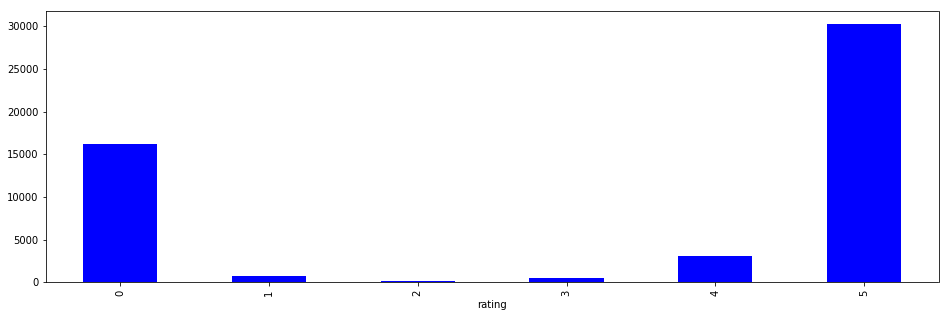

In [11]:
#plotting bar graph
Ride_Data.groupby('rating').size().plot(kind='bar' , color='b', figsize=(16,5))

In [12]:
#adding a average speed column
Ride_Data['avg_speed'] = (Ride_Data['distance_travelled']/Ride_Data['duration_time'])
Ride_Data.head()

,Unnamed: 0,customer_id,driver_id,creation_date,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated,avg_speed
0,0,52400320,1838640,2017-09-08 11:32:05.000,1,1,0.0,7.28666,7.17712,0,11,18,2,0.0,17.375184,0,4,1,0.662424
1,1,29858456,1793472,2017-09-08 12:42:33.000,1,1,0.0,1.25836,1.05664,0,4,1,1,0.0,8.507064,0,4,1,0.314590
2,2,30828968,1726788,2017-09-08 12:46:42.000,2,1,0.0,14.57820,14.44060,0,16,3,2,0.0,19.745205,0,5,1,0.911138
3,3,47974768,1181696,2017-09-08 13:52:35.000,2,1,0.0,1.51911,1.18684,0,8,0,5,0.0,10.968003,0,0,0,0.189889
4,4,59503764,2063752,2017-09-08 14:18:47.000,2,1,0.0,11.09320,10.67240,0,19,1,4,0.0,17.595398,0,5,1,0.583853


DATA EXLORATION..

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.

In [13]:
Ride_numeric = Ride_Data.select_dtypes(include=['float64', 'int64'])
Ride_numeric.head()

,Unnamed: 0,customer_id,driver_id,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated,avg_speed
0,0,52400320,1838640,1,1,0.0,7.28666,7.17712,0,11,18,2,0.0,17.375184,0,4,1,0.662424
1,1,29858456,1793472,1,1,0.0,1.25836,1.05664,0,4,1,1,0.0,8.507064,0,4,1,0.314590
2,2,30828968,1726788,2,1,0.0,14.57820,14.44060,0,16,3,2,0.0,19.745205,0,5,1,0.911138
3,3,47974768,1181696,2,1,0.0,1.51911,1.18684,0,8,0,5,0.0,10.968003,0,0,0,0.189889
4,4,59503764,2063752,2,1,0.0,11.09320,10.67240,0,19,1,4,0.0,17.595398,0,5,1,0.583853


In [14]:
Ride_numeric.describe()

,Unnamed: 0,customer_id,driver_id,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated,avg_speed
count,51083.000000,5.108300e+04,5.108300e+04,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,51083.000000,4.953800e+04
mean,25541.000000,3.701478e+07,1.581080e+06,1.509817,1.111348,0.917110,6.810667,6.292355,1.929370,16.265392,2.471370,6.056301,1.681055,13.718933,0.042774,3.263121,0.682752,inf
std,14746.536237,1.831212e+07,4.461198e+05,0.506677,0.446606,4.409016,6.671300,6.493241,6.426472,14.043821,2.960479,8.679217,5.413482,4.628049,0.202348,2.297473,0.465410,NaN
min,0.000000,4.092000e+05,5.093000e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,12770.500000,2.047212e+07,1.301384e+06,1.000000,1.000000,0.000000,3.199195,2.815185,0.000000,8.000000,0.000000,2.000000,0.000000,10.860325,0.000000,0.000000,0.000000,3.164229e-01
50%,25541.000000,3.970655e+07,1.720492e+06,2.000000,1.000000,0.000000,5.358200,4.852870,0.000000,13.000000,2.000000,4.000000,0.000000,12.674608,0.000000,5.000000,1.000000,4.068098e-01
75%,38311.500000,5.403015e+07,1.953104e+06,2.000000,1.000000,0.000000,8.565545,7.915150,0.000000,21.000000,3.000000,8.000000,0.000000,16.287307,0.000000,5.000000,1.000000,5.156111e-01
max,51082.000000,6.388676e+07,2.203644e+06,4.000000,6.000000,347.556000,325.504000,324.568000,232.000000,666.000000,73.000000,524.000000,72.522902,50.540852,1.000000,5.000000,1.000000,inf


In [15]:
#dropping booking_source, estimated distance , estimated duration , estimated price
Ride_numeric = Ride_numeric.drop(['Unnamed: 0','booking_source', 'estimated_distance','estimated_duration','estimated_price'], axis=1)
Ride_numeric.head()

,customer_id,driver_id,car_type,distance_travelled,distance_travelled_while_moving,duration_time,wait_time_initial,wait_time_in_journey,price,is_cancelled,rating,was_rated,avg_speed
0,52400320,1838640,1,7.28666,7.17712,11,18,2,17.375184,0,4,1,0.662424
1,29858456,1793472,1,1.25836,1.05664,4,1,1,8.507064,0,4,1,0.314590
2,30828968,1726788,1,14.57820,14.44060,16,3,2,19.745205,0,5,1,0.911138
3,47974768,1181696,1,1.51911,1.18684,8,0,5,10.968003,0,0,0,0.189889
4,59503764,2063752,1,11.09320,10.67240,19,1,4,17.595398,0,5,1,0.583853


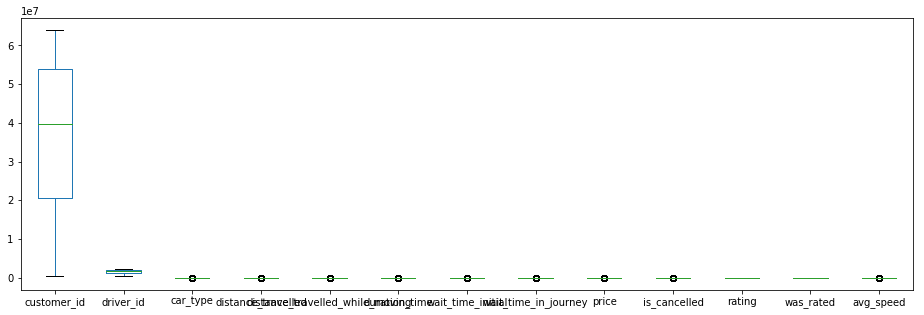

In [16]:
#all numeric columns

Ride_numeric.plot(kind='box', figsize=(16,5))

In [17]:
def scatterplot(df,var):
    
    plt.scatter(df[var],Ride_Data['rating'])
    plt.xlabel(var); plt.ylabel('rating')
    plt.title('Scatter Plot for '+var+' vs Rating')

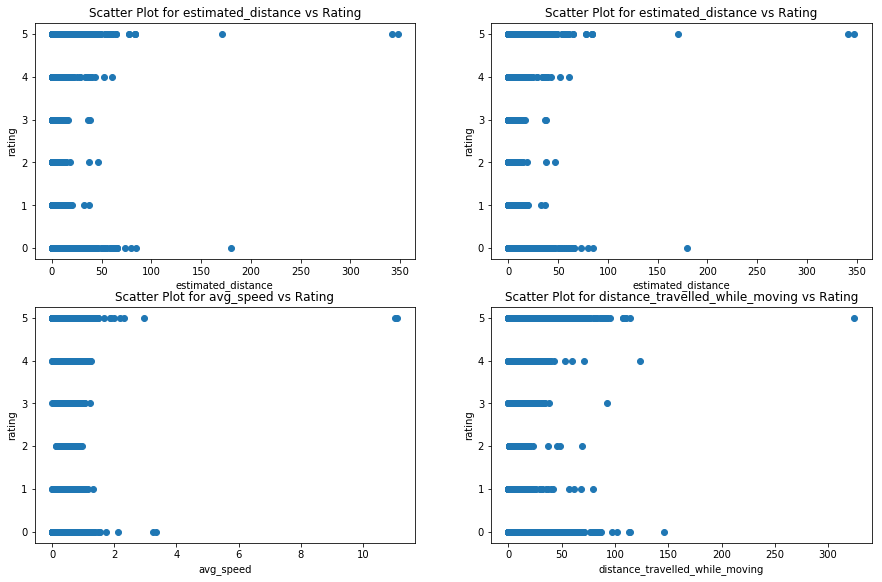

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
scatterplot(Ride_Data,'estimated_distance')    
plt.subplot(4,2,2)
scatterplot(Ride_Data,'estimated_distance')    
plt.subplot(4,2,3)
scatterplot(Ride_Data,'avg_speed')
plt.subplot(4,2,4)
scatterplot(Ride_Data,'distance_travelled_while_moving')
plt.show()
plt.tight_layout()

In [19]:
# correlation matrix
cor = Ride_numeric.corr()
cor

,customer_id,driver_id,car_type,distance_travelled,distance_travelled_while_moving,duration_time,wait_time_initial,wait_time_in_journey,price,is_cancelled,rating,was_rated,avg_speed
customer_id,1.000000,0.045945,0.069472,-0.017624,-0.019230,-0.004375,0.019923,0.008986,-0.025044,0.082338,-0.029308,-0.020310,-0.046452
driver_id,0.045945,1.000000,-0.063538,-0.031653,-0.033957,-0.009885,-0.020482,0.002708,-0.046234,0.002172,0.014043,0.013894,-0.058368
car_type,0.069472,-0.063538,1.000000,-0.003485,-0.001582,-0.008994,0.014537,-0.020647,-0.057150,0.085936,-0.032561,-0.028678,0.002804
distance_travelled,-0.017624,-0.031653,-0.003485,1.000000,0.996865,0.726301,0.018720,0.376241,0.862935,-0.215806,0.014379,0.019337,0.430780
distance_travelled_while_moving,-0.019230,-0.033957,-0.001582,0.996865,1.000000,0.683553,0.022044,0.318188,0.845985,-0.204850,0.011312,0.015890,0.466395
duration_time,-0.004375,-0.009885,-0.008994,0.726301,0.683553,1.000000,-0.005463,0.854515,0.772406,-0.223529,0.031835,0.038382,-0.046893
wait_time_initial,0.019923,-0.020482,0.014537,0.018720,0.022044,-0.005463,1.000000,-0.006189,0.102671,0.339604,-0.164681,-0.157539,-0.043904
wait_time_in_journey,0.008986,0.002708,-0.020647,0.376241,0.318188,0.854515,-0.006189,1.000000,0.514305,-0.147507,0.028685,0.035254,-0.310980
price,-0.025044,-0.046234,-0.057150,0.862935,0.845985,0.772406,0.102671,0.514305,1.000000,-0.171525,-0.015865,-0.008594,0.316583
is_cancelled,0.082338,0.002172,0.085936,-0.215806,-0.204850,-0.223529,0.339604,-0.147507,-0.171525,1.000000,-0.300239,-0.310107,-0.271651


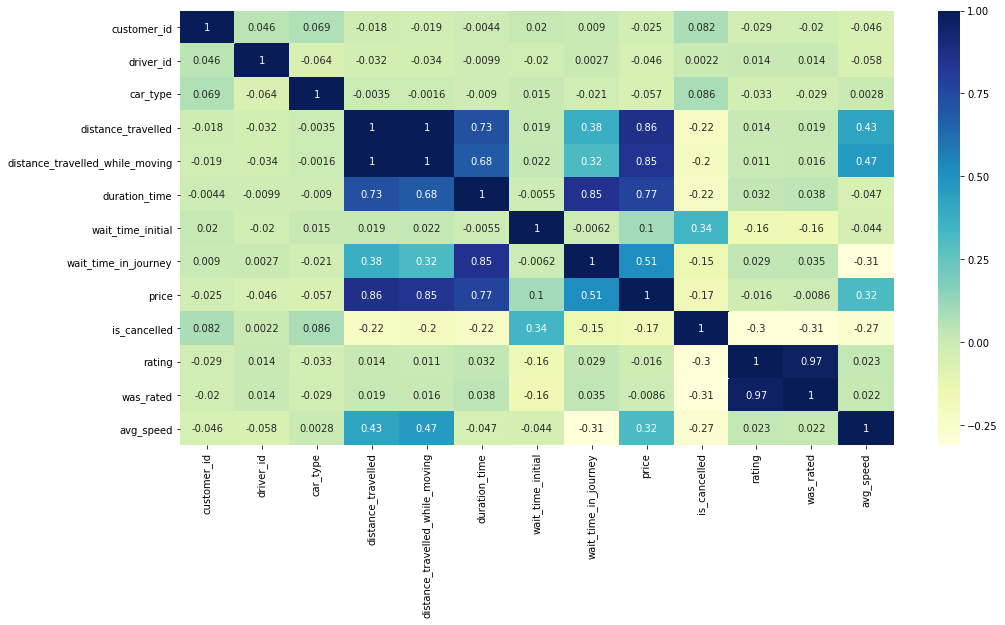

In [20]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of Rating with independent variables:

Rating is highly (positively) correlated with average speed, wait time for the journey, time duration, distance travelled, distance travelled while moving and driver_id

Rating is negatively correlated to price, wait time initial and car type . This suggest that Rides having high price , making the customer to wait longer and the type of the cars provided gives a bad rating

Correlation among independent variables:

Many independent variables are highly correlated : distance traveled ,time taken, price,wait time etc. are all measures of 'time and distance', and are positively correlated Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

In [21]:
Ride_numeric.groupby(['car_type','rating']).size().unstack()

rating,0,1,2,3,4,5
car_type,,,,,,
1,15079.0,647.0,193.0,533.0,2887.0,28592.0
2,159.0,11.0,4.0,12.0,29.0,428.0
3,954.0,48.0,14.0,31.0,170.0,1268.0
4,14.0,NaN,NaN,NaN,NaN,8.0
5,NaN,NaN,NaN,NaN,NaN,1.0
6,NaN,NaN,NaN,NaN,NaN,1.0


In [22]:
Ride_numeric.dropna

<bound method DataFrame.dropna of        customer_id  driver_id  car_type  distance_travelled  \
0         52400320    1838640         1            7.286660   
1         29858456    1793472         1            1.258360   
2         30828968    1726788         1           14.578200   
3         47974768    1181696         1            1.519110   
4         59503764    2063752         1           11.093200   
5         57190176     650924         1            6.317710   
6         12257432    1308432         1            4.036700   
7         55498260    2020484         1            5.103300   
8         18333420    1994096         1           11.075100   
9         54548632    1812244         1            1.846860   
10        22667372    1854468         1            4.613120   
11        60007004    2069088         1            4.283940   
12        54628120    1927652         1            2.852560   
13        20556788    1614776         1            3.266530   
14        25861980   

In [23]:
x= Ride_numeric.iloc[:,[0,1,2,3,4,5,6,7,8]]
x.head(2)

,customer_id,driver_id,car_type,distance_travelled,distance_travelled_while_moving,duration_time,wait_time_initial,wait_time_in_journey,price
0,52400320,1838640,1,7.28666,7.17712,11,18,2,17.375184
1,29858456,1793472,1,1.25836,1.05664,4,1,1,8.507064


In [24]:
y=Ride_numeric.iloc[:,[10]]
y.head(2)

,rating
0,4
1,4


In [25]:
Ride_Data_test.columns

Index(['Unnamed: 0', 'customer_id', 'driver_id', 'creation_date',
       'booking_source', 'car_type', 'estimated_distance',
       'distance_travelled', 'distance_travelled_while_moving',
       'estimated_duration', 'duration_time', 'wait_time_initial',
       'wait_time_in_journey', 'estimated_price', 'price', 'is_cancelled'],
      dtype='object')

In [26]:
z= Ride_Data_test.iloc[:,[1,2,5,7,8,10,11,12,13,14,15]]
z.head(2)

,customer_id,driver_id,car_type,distance_travelled,distance_travelled_while_moving,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled
0,60956364,1761208,1,14.58090,13.63340,35,0,14,0.0,20.581726,0
1,60777268,1863028,1,3.11665,2.78458,9,1,3,0.0,10.968003,0


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
classifier = LogisticRegression(random_state = 1)

In [29]:
classifier.fit(x, y)

C:\Users\jhj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jhj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jhj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
y_pred = classifier.predict(x)
y_pred

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [31]:
pred_left = pd.DataFrame(y_pred)
pred_left.head()

,0
0,5
1,5
2,5
3,5
4,5


In [32]:
#logistic regression model score
classifier.score(x,y)

0.5931131687645597

In [33]:
Ride_Data.columns

Index(['Unnamed: 0', 'customer_id', 'driver_id', 'creation_date',
       'booking_source', 'car_type', 'estimated_distance',
       'distance_travelled', 'distance_travelled_while_moving',
       'estimated_duration', 'duration_time', 'wait_time_initial',
       'wait_time_in_journey', 'estimated_price', 'price', 'is_cancelled',
       'rating', 'was_rated', 'avg_speed'],
      dtype='object')

In [34]:
x_pred= Ride_Data[['customer_id', 'driver_id','booking_source', 'car_type','distance_travelled', 'distance_travelled_while_moving', 'duration_time', 'wait_time_initial','wait_time_in_journey', 'price', 'is_cancelled','was_rated']]
y_pred= Ride_Data[['rating']]

In [35]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_pred,y_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
y_actual_pred = pd.DataFrame(regressor.predict(x_pred),columns = ['y_pred'])
round(y_actual_pred).head(5)

,y_pred
0,5.0
1,5.0
2,5.0
3,0.0
4,5.0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pred, y_pred, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
regressor.score(X_train, y_train)

0.938157257770777

In [40]:
y_test_pred = pd.DataFrame(regressor.predict(X_test),columns = ['y_pred_test'])
round(y_test_pred).head(5)

,y_pred_test
0,5.0
1,5.0
2,5.0
3,5.0
4,0.0


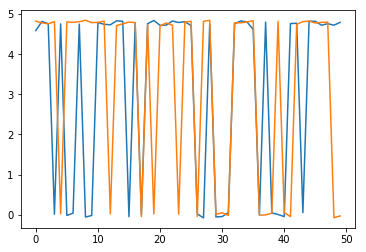

In [41]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(y_actual_pred.head(50))
ax1.plot(y_test_pred.head(50))

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model = RandomForestClassifier(max_depth=9, random_state=None,max_features='auto',max_leaf_nodes=6,n_estimators=105,criterion='gini')

In [44]:
model.fit(x, y)

C:\Users\jhj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=6,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=105, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
#random forest model score
model.score(x,y)

0.6356517823933598